# Sentiment Analysis on Twitter Data using NLP and Machine Learning

In [12]:
!pip install textblob wordcloud

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/15.5 MB 8.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/15.5 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.5 MB 4.4 MB/s eta 0:00:03
   -------- ------------------------------- 3.1/15.5 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 3.9/15.5 MB 3.6 MB/s eta 0:00:04
   ------------- -------------------------- 5.2/15.5 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/15.5 MB 4.1 MB/s eta 0:00:03
   ------------------- -

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.


In [14]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
!pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\laksh\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
    File "C:\Users\laksh\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\laksh\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 137, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\laksh\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 70, in _build_b

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Step 2: Load Dataset
df = pd.read_csv("tweets.csv") # Replace with your path
print("Original Columns:", df.columns)
# Preview the dataset
print(df[['text', 'location']].head())

Original Columns: Index(['id', 'created_at', 'text', 'location'], dtype='object')
                                                text            location
0  @CIBC please explain to me why I want to remai...              Canada
1  RT @CIBCLiveLabs: We are pleased to announce, ...     Oshawa, Ontario
2  CIBC World Markets Inc. Decreases Holdings in ...     The Netherlands
3  Le patron de la Banque @cibc s’attend à un ral...            Montréal
4  Your home is a valuable asset. Use your equity...  Lower Mainland, BC


In [7]:
# Step 3: Clean the Tweet Text
def clean_text(text):
 text = re.sub(r"http\S+", "", str(text)) # Remove URLs
 text = re.sub(r"@\S+|#\S+", "", text) # Remove mentions/hashtag
 text = re.sub(r"[^A-Za-z\s]", "", text) # Remove special characte
 text = text.lower()
 return text
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
 return ' '.join([word for word in text.split() if word not in stop_words])
df['clean_text'] = df['text'].apply(clean_text).apply(remove_stopwords)
print("Sample cleaned tweet:")
print(df['clean_text'].head(1).values[0])

Sample cleaned tweet:
please explain want remain card holder called travel concierge number b


In [9]:
# Step 4: Auto-label Tweets Using TextBlob
def get_sentiment(text):
 polarity = TextBlob(text).sentiment.polarity
 return 1 if polarity > 0 else 0
df['label'] = df['clean_text'].apply(get_sentiment)
# Optional: Check sentiment distribution
print("Sentiment counts:")
print(df['label'].value_counts())

Sentiment counts:
label
0    1159
1     792
Name: count, dtype: int64


In [11]:
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

In [15]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       237
           1       0.84      0.73      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



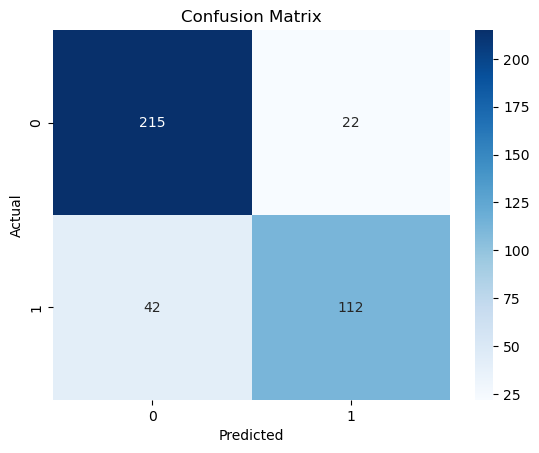

In [19]:
# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

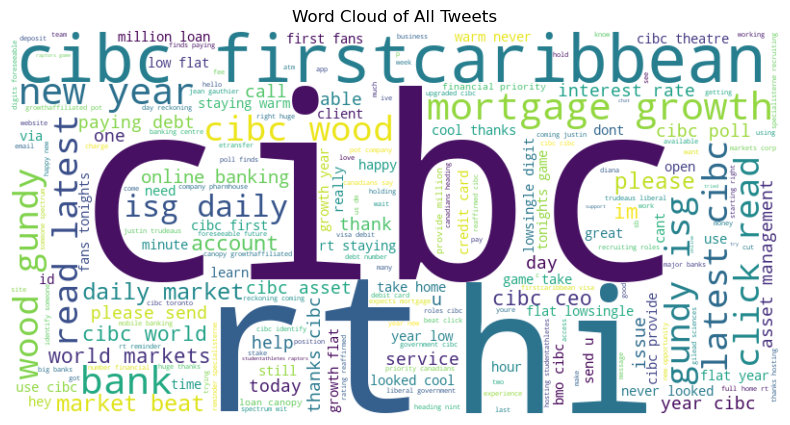

In [23]:
# Word Cloud Visualization
from wordcloud import WordCloud

all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()
